In [48]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df=pd.read_csv("titanic (1).csv")
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
595,596,0,3,"Van Impe, Mr. Jean Baptiste",male,36.0,1,1,345773,24.1500,NaN,S
787,788,0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.1250,NaN,Q
530,531,1,2,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S
416,417,1,2,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",female,34.0,1,1,28220,32.5000,NaN,S
391,392,1,3,"Jansson, Mr. Carl Olof",male,21.0,0,0,350034,7.7958,NaN,S


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [51]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [52]:
df.shape

(891, 12)

In [53]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [54]:
df['Age'] = [i * 100 if i < 1 else i for i in df['Age']]

In [55]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,30.415966,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.953362,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.750000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,39.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,92.000000,8.000000,6.000000,512.329200


In [56]:
AgeNoNull=df["Age"].dropna()

In [57]:
agemed=np.median(AgeNoNull)
agemed

28.75

In [58]:
df.fillna({"Age":agemed},inplace=True)

In [59]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [60]:
df.drop(columns=['Cabin','Embarked','Name','Ticket','PassengerId'],inplace=True)

In [61]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [62]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [63]:
enconder=LabelEncoder()
enconder.fit(df['Sex'])
encodedlabels=enconder.fit_transform(df['Sex'])
df['Sex']=encodedlabels
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [64]:
scaler=StandardScaler()
Farearray=np.array(df['Fare'])
scaler.fit(Farearray.reshape(-1,1))
ScaledValues=scaler.fit_transform(Farearray.reshape(-1,1))
df['Fare']=ScaledValues
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [65]:
X=df.drop(columns='Survived')
y=df['Survived']

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [74]:
features=df.drop(columns=['Survived','Parch','SibSp','Fare'])
target=df['Survived']

In [75]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,shuffle=True,random_state=0)

In [76]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

# DecisionTreeClassifier

In [77]:
clf = DecisionTreeClassifier(criterion='entropy')  
clf.fit(x_train, y_train)


feature_importances,feature_Name = clf.feature_importances_,clf.feature_names_in_

for feature, importance in zip(feature_Name,feature_importances):
    print(f'Feature: {feature}, Information Gain: {importance}')

Feature: Pclass, Information Gain: 0.1633811865526287
Feature: Sex, Information Gain: 0.360451406963678
Feature: Age, Information Gain: 0.47616740648369316


In [78]:
y_predict=clf.predict(x_test)
print(accuracy_score(y_pred=y_predict,y_true=y_test))
print(f1_score(y_true=y_test,y_pred=y_predict))
confusion_matrix(y_true=y_test,y_pred=y_predict)

0.8156424581005587
0.7518796992481203


array([[96, 14],
       [19, 50]], dtype=int64)

<Axes: >

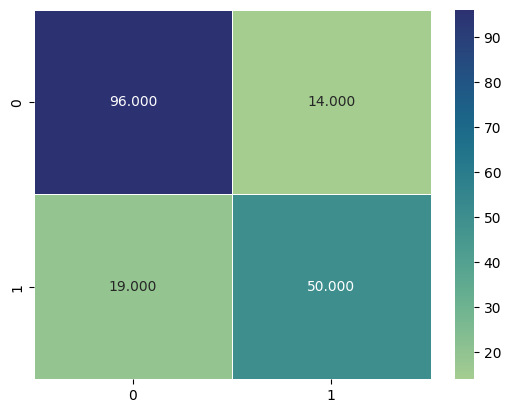

In [79]:
sns.heatmap(confusion_matrix(y_true=y_test,y_pred=y_predict),annot=True,fmt='.3f',cmap='crest',linewidths=0.5)

In [80]:
kfold = KFold(n_splits=5, random_state=11, shuffle=True)
scores = cross_val_score(estimator=clf,X=features, y=target, cv=kfold)

In [81]:
scores.mean()

0.8125164773083924

# Randmon forest classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
RMF=RandomForestClassifier(max_depth=10)

In [84]:
RMF.fit(x_train,y_train)

RandomForestClassifier(max_depth=10)

In [85]:
y_predict=RMF.predict(x_test)
print(accuracy_score(y_pred=y_predict,y_true=y_test))
print(f1_score(y_true=y_test,y_pred=y_predict))
confusion_matrix(y_true=y_test,y_pred=y_predict)

0.8212290502793296
0.7611940298507462


array([[96, 14],
       [18, 51]], dtype=int64)

In [86]:
kfold = KFold(n_splits=5, random_state=11, shuffle=True)
scores = cross_val_score(estimator=RMF,X=features, y=target, cv=kfold)

In [87]:
scores.mean()

0.8091519678614023